In [1]:
import pandas as pd ## import pandas
import numpy as np ## import numpy
from keras.preprocessing.sequence import TimeseriesGenerator ## import TimeseriesGenerator dari keras.preprocessing.sequence untuk membuat data generator
from sklearn.preprocessing import MinMaxScaler ## berfungsi untuk melakukan normalisasi data
import plotly.graph_objects as go ## berfungsi untuk membuat grafik
from keras.models import Sequential ## berfungsi untuk membuat model sequential
from keras.layers import LSTM, Dense, Activation ## berfungsi untuk membuat layer LSTM, Dense, Activation
from statsmodels.tsa.seasonal import seasonal_decompose ## berfungsi untuk membuat seasonal decompose
import matplotlib.pyplot as plt ## berfungsi untuk membuat grafik
from IPython.display import display ## berfungsi untuk menampilkan data

In [2]:
# Load data
dataframe = pd.read_excel('datasetbulanan.xlsx') ## load dataset covid 19 dari excel
dataframe.index = [i for i in range(1, len(dataframe.values)+1)] ## membuat index baru
display(dataframe.head()) ## menampilkan data
# Mengubah format tanggal
dataframe['Date'] = pd.to_datetime(dataframe['Date'], format='%d/%m/%y').dt.strftime('%Y-%m-%d') ## mengubah format tanggal dari dd/mm/yy menjadi yyyy-mm-dd
display(dataframe.head()) ## menampilkan data
# Membuat Varibel Date, Data dan Cases
date = dataframe['Date'].tolist() ## mengubah data date menjadi list
data = dataframe['Cases'] ## mengubah data cases menjadi list
cases = dataframe['Cases'] ## mengubah data cases menjadi list


,Date,Cases
1,2020-06-01,1
2,2020-07-01,5
3,2020-08-01,1
4,2020-09-01,7
5,2020-10-01,7


,Date,Cases
1,2020-06-01,1
2,2020-07-01,5
3,2020-08-01,1
4,2020-09-01,7
5,2020-10-01,7


In [3]:
print('Jumlah Data :', len(dataframe)) ## menampilkan jumlah data
# Mengubah Dataset Menjadi Numpy Array
dataset = np.array(data) ## mengubah data menjadi numpy array
print('Dataset Shape :', dataset.shape) ## menampilkan shape dari dataset

Jumlah Data : 31
Dataset Shape : (31,)


In [4]:
trace = go.Scatter(
    x = date,
    y = cases,
    mode = 'lines',
    name = 'Data'
) ## membuat grafik dengan mode lines
layout = go.Layout(
    title = "Covid 19",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Cases"}
) ## membuat layout dengan title dan xaxis dan yaxis
fig = go.Figure(data=[trace], layout=layout) ## membuat figure dengan data dan layout
fig.show() ## menampilkan figure

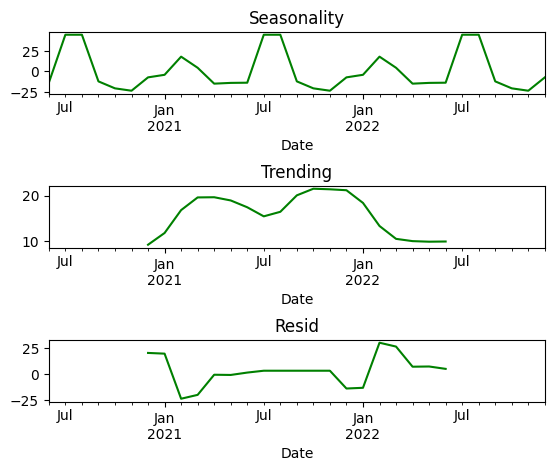

In [5]:
# Menampilkan Grafik Seasonal Decompose
df_sd_date = pd.to_datetime(dataframe['Date'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d') ## mengubah format tanggal dari yyyy-mm-dd menjadi yyyy-mm-dd
df_sd_case = dataframe['Cases'] ## mengubah data cases menjadi list
df_sd = pd.DataFrame(df_sd_case) ## mengubah data menjadi dataframe
df_sd.index = pd.DatetimeIndex(df_sd_date) ## mengubah index menjadi datetimeindex
fig = plt.Figure(figsize=(12,7)) ## membuat figure dengan ukuran 12x7
ax1 = plt.subplot(311) ## membuat subplot dengan 3 baris 1 kolom
ax2 = plt.subplot(312) ## membuat subplot dengan 3 baris 1 kolom
ax3 = plt.subplot(313) ## membuat subplot dengan 3 baris 1 kolom
sd = seasonal_decompose(df_sd) ## membuat seasonal decompose
sd.seasonal.plot(color='green', ax=ax1, title='Seasonality') ## membuat grafik seasonal
sd.trend.plot(color='green', ax=ax2, title='Trending') ## membuat grafik trending
sd.resid.plot(color='green', ax=ax3, title='Resid') ## membuat grafik resid
plt.subplots_adjust(hspace=1.5) ## membuat jarak antar subplot
plt.show() ## menampilkan figure